<a href="https://colab.research.google.com/github/andiniassya/Data-mining-and-business-intelligent/blob/main/FinalProject_Kelompok_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Final Project UAS Data Mining**
### **Kelompok I**

1. **Anantawidya Prayoga** (2006483523)
> Mengerjakan bagian 1 (Data)

2. **Andini Assyahidah** (2006571040)
> Mengerjakan bagian 6 (Kesimpulan)

3. **Kezia Emmanuela Bangun** (2006572964)
> Mengerjakan bagian 5 (Social Network Analysis)

4. **Laily Nur Azizah** (2006464234)
> Mengerjakan bagian 4 (Sentiment Analysis)

5. **Muhammad Ammar Daffa** (2006571066)
> Mengerjakan bagian 3 (Explaratory Data Analysis)

6. **Yasmin Khairunnisa** (2006571091)
> Mengerjakan bagian 2 (Pre-processing)

## **Link Video**
https://drive.google.com/drive/folders/1w7WMGFi5FDpv0eSyHqeLu8hYr-JE1uXJ?usp=share_link

## **Import Module**

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.7 MB/s 


In [ ]:
pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.3 MB/s 


In [ ]:
pip install better_profanity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 2.2 MB/s 


In [ ]:
pip install --upgrade git+https://github.com/kevctae/twint.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kevctae/twint.git to /tmp/pip-req-build-07ze74tx
  Running command git clone -q https://github.com/kevctae/twint.git /tmp/pip-req-build-07ze74tx
     |████████████████████████████████| 265 kB 5.2 MB/s 
     |████████████████████████████████| 385 kB 54.9 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 288 kB 45.6 MB/s 
     |████████████████████████████████| 49 kB 6.1 MB/s 
     |████████████████████████████████| 59 kB 6.9 MB/s 
     |████████████████████████████████| 140 kB 56.0 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=39180 sha256=c88759b34309a43ab241242509c41c3a3b97e9a7a35193e308b0bad64f1deab5
  Stored in directory: /tmp/pip-ephem-wheel-cache-5w_fyx6w/wheels/de/66/ce/1d0e7f533048436bc24ec9d2d55bc759542faa4fe80bc0b9

In [ ]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
import time
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import re 
from tweepy import OAuthHandler 
from textblob import TextBlob 
from wordcloud import WordCloud
from better_profanity import profanity
import warnings; warnings.simplefilter('ignore')
import itertools, re, nltk
import time, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns 
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
import twint
import nest_asyncio
import pandas as pd

nltk.download('punkt')

nest_asyncio.apply()
config = twint.Config()
config.Hide_output = True
config.Pandas = True
config.Retweets = True
config.Profile_full = True

factory = StopWordRemoverFactory()
stemmer = StemmerFactory().create_stemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Berikut fungsi untuk mendapatkan data dari twitter, disini kami menge-set limit 10000, sehingga bisa mendapatkan kurang lebih 10000 tweet

In [ ]:
# config.Search = "piala dunia"
# config.Limit = 10000

# twint.run.Search(config)
# data = twint.storage.panda.Tweets_df
# # del twint, config, nest_asyncio
# print(data.shape)

# data.head()

Fungsi untuk convert data ke csv, lalu file csv akan didownload dan diupload ke github, sehingga data yang kami gunakan ber-directory ke github 

In [ ]:
# data.to_json(r'data_tweet.json')
# data.to_csv(r'data_tweet.csv', index=False, encoding='utf8')
# "Done"

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ammardaffa/dataset/main/data_tweet%20(1).csv", sep=',')
print(df.shape)
df.head()

(10015, 38)


,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608257576504029184,1608257542047793159,1672273460000.0,2022-12-29 00:24:20,0,NaN,"Coba cek ini deh, Twibbonize ARGENTINA JUARA P...",in,['twbb'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608255237814652928,1608086136752328704,1672272903000.0,2022-12-29 00:15:03,0,NaN,@CNNIndonesia Makanya suporter harus spotip ja...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN
2,1608254931022262272,1608254931022262272,1672272830000.0,2022-12-29 00:13:50,0,NaN,Info Bola : Lionel Messi Akan Kembali Ke Barce...,in,"['beritaolahraga', 'pialadunia', 'infobola', '...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608254864446083072,1608254864446083072,1672272814000.0,2022-12-29 00:13:34,0,NaN,"5 Maskapai Terbaik Dunia, Dapat 'Piala Oscar' ...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608254193806233600,1608254193806233600,1672272654000.0,2022-12-29 00:10:54,0,NaN,"Pemain keturunan Indonesia, Van Bronchost mn...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


## **Data**

In [ ]:
df

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1608257576504029184,1608257542047793159,1672273460000.0,2022-12-29 00:24:20,0,NaN,"Coba cek ini deh, Twibbonize ARGENTINA JUARA P...",in,['twbb'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1608255237814652928,1608086136752328704,1672272903000.0,2022-12-29 00:15:03,0,NaN,@CNNIndonesia Makanya suporter harus spotip ja...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN
2,1608254931022262272,1608254931022262272,1672272830000.0,2022-12-29 00:13:50,0,NaN,Info Bola : Lionel Messi Akan Kembali Ke Barce...,in,"['beritaolahraga', 'pialadunia', 'infobola', '...",[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1608254864446083072,1608254864446083072,1672272814000.0,2022-12-29 00:13:34,0,NaN,"5 Maskapai Terbaik Dunia, Dapat 'Piala Oscar' ...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1608254193806233600,1608254193806233600,1672272654000.0,2022-12-29 00:10:54,0,NaN,"Pemain keturunan Indonesia, Van Bronchost mn...",in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,1605216902892072960,1605216902892072960,1671548507000.0,2022-12-20 15:01:47,0,NaN,SUKSES adalah seberapa hokinya anda dalam taru...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10011,1605216785153810433,1605216785153810433,1671548479000.0,2022-12-20 15:01:19,0,NaN,Rapper ternama Drake kehilangan uang Rp15 mili...,in,['detiknetwork'],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10012,1605216768632430592,1605216768632430592,1671548475000.0,2022-12-20 15:01:15,0,NaN,Rapper ternama Drake kehilangan uang Rp15 mili...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
10013,1605216733471444992,1605114894109769729,1671548467000.0,2022-12-20 15:01:07,0,NaN,@Amierkhan25 @bendower67 @FaktaSepakbola portu...,in,[],[],...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Amierkhan25', 'name': 'amirk...",NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10015 non-null  object 
 1   conversation_id  10015 non-null  object 
 2   created_at       10015 non-null  object 
 3   date             10015 non-null  object 
 4   timezone         10015 non-null  int64  
 5   place            7 non-null      object 
 6   tweet            10015 non-null  object 
 7   language         10014 non-null  object 
 8   hashtags         10014 non-null  object 
 9   cashtags         10014 non-null  object 
 10  user_id          10014 non-null  object 
 11  user_id_str      10014 non-null  object 
 12  username         10014 non-null  object 
 13  name             10013 non-null  object 
 14  day              10013 non-null  float64
 15  hour             10014 non-null  object 
 16  link             10014 non-null  object 
 17  urls        

## **Pre-processing**

In [ ]:
#Total Missing Values
print(df.isnull().sum())

id                     0
conversation_id        0
created_at             0
date                   0
timezone               0
place              10008
tweet                  0
language               1
hashtags               1
cashtags               1
user_id                1
user_id_str            1
username               1
name                   2
day                    2
hour                   1
link                   1
urls                   1
photos                 1
video                  2
thumbnail           8245
retweet                2
nlikes                 2
nreplies               2
nretweets              2
quote_url           9536
search                 2
near               10014
geo                10015
source             10015
user_rt_id         10015
user_rt            10015
retweet_id         10015
reply_to               2
retweet_date       10015
translate          10015
trans_src          10015
trans_dest         10015
dtype: int64


Akan dihapus kolom dengan missing value yang banyak dan sekiranya tidak digunakan dalam analisis

In [ ]:
df.drop(["place","thumbnail","retweet","quote_url","near","geo","source","user_rt_id","user_rt","retweet_id",'retweet_date','translate','trans_src','trans_dest'],axis=1,inplace = True)

Lalu untuk missing value yang tersisa, kita akan menghilangkannya saja karena jumlahnya yang sangat sedikit.

In [ ]:
df.dropna(axis=0, inplace=True)

In [ ]:
# #Mengisi baris 'NaN' ini keknya gk usah, mending diilangin aja missing valuenya daripada ditambel
# df.fillna(method = 'ffill', inplace = True)
# df.head()

In [ ]:
print(df.shape)
print(df.isnull().sum())

(10012, 24)
id                 0
conversation_id    0
created_at         0
date               0
timezone           0
tweet              0
language           0
hashtags           0
cashtags           0
user_id            0
user_id_str        0
username           0
name               0
day                0
hour               0
link               0
urls               0
photos             0
video              0
nlikes             0
nreplies           0
nretweets          0
search             0
reply_to           0
dtype: int64


In [ ]:
df1 = df.copy()

In [ ]:
df1.describe()

,timezone,day,video,nlikes,nreplies,nretweets
count,10012.0,10012.000000,10012.000000,10012.000000,10012.000000,10012.000000
mean,0.0,3.804335,0.176688,15.352277,1.411906,1.815421
std,0.0,1.646993,0.381423,240.262249,19.454403,26.963515
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,4.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,5.000000,0.000000,1.000000,0.000000,0.000000
max,0.0,7.000000,1.000000,15303.000000,1006.000000,1542.000000


In [ ]:
df = df[['tweet']]
df.at[0,'tweet']

'Coba cek ini deh, Twibbonize ARGENTINA JUARA PIALA DUNIA 2022 melalui link  https://t.co/uhOnheKnJT. #twbb 55856f BF6109 💎💎 FABBB3 AC4C04 7D9978 B890A0 B0B870 989098 A8B0C0 703838 A07070 806090 C0C058 788078 A8B078 C8C878 402028 483080 70B078 (part 13)'

In [ ]:
# Convert only the tweets into a list
tweet_list = df.tweet.to_list()

In [ ]:
# Loading Stopwords

Sastrawi_StopWords_id = factory.get_stop_words()

print(Sastrawi_StopWords_id)
print(len(Sastrawi_StopWords_id))

Sastrawi_StopWords_id = set(Sastrawi_StopWords_id) # Biasakan hal ini

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [ ]:
def cleanText(txt):
    docx = unidecode(unescape(txt.lower().strip()))
    urlPattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    docx = re.sub(urlPattern,' ', docx) # Remove links
    docx = re.sub(r'[^\w]', ' ', docx) # Remove Symbol, keep "_" ... recommended
    Tokens = TextBlob(docx).words # Tokenisasi 
    docx = ' '.join([t for t in Tokens if str(t) not in Sastrawi_StopWords_id and len(t)>2]) # Stopwords filtering
    docx = stemmer.stem(docx)
    return docx

Berikut adalah fungsi untuk melakukan cleaning untuk kolom tweet, karena prosesnya yang terlalu lama, kami melakukan pre-cleaning dan mengupload nya ke github seperti data awal.

In [ ]:
# df['clean_tweet'] = '' # inititate kolom kosong
# for idx, post in tqdm(df.iterrows()):
#     df.at[idx, 'clean_tweet'] = cleanText(post.tweet)
    
# df.head()

In [ ]:
cleaned_tweet = pd.read_csv("https://raw.githubusercontent.com/ammardaffa/dataset/main/cleaned_tweet.txt", header=None, encoding='utf8')
cleaned_tweet.columns = ['cleaned_tweet']
print(cleaned_tweet.shape)
cleaned_tweet

(10015, 1)


,cleaned_tweet
0,coba cek deh twibbonize argentina juara piala ...
1,cnnindonesia makanya suporter spotip jangan tu...
2,info bola lionel messi barcelona free agent ju...
3,maskapai baik dunia piala oscar layan
4,main turun indonesia van bronchost mnjadi kapt...
...,...
10010,sukses berapa hoki taruh piala dunia
10011,rapper nama drake hilang uang rp15 miliar mesk...
10012,rapper nama drake hilang uang rp15 miliar mesk...
10013,amierkhan25 bendower67 faktasepakbola portugal...


In [ ]:
tweet_list = cleaned_tweet.cleaned_tweet.to_list()

In [ ]:
tweet_list = [str(x) for x in tweet_list]
tweet_list

['coba cek deh twibbonize argentina juara piala dunia 2022 lalu link twbb 55856f bf6109 fabbb3 ac4c04 7d9978 b890a0 b0b870 989098 a8b0c0 703838 a07070 806090 c0c058 788078 a8b078 c8c878 402028 483080 70b078 part',
 'cnnindonesia makanya suporter spotip jangan turun lapang dukung kalah ngeri gmn piala dunia',
 'info bola lionel messi barcelona free agent juli 2023 kembali sang icon capten catalan sportalavista the goat barcelona cinta musim panas 2023 beritaolahraga pialadunia infobola worldcup agenbola',
 'maskapai baik dunia piala oscar layan',
 'main turun indonesia van bronchost mnjadi kapten belanda hasil capai babakfinal piala dunia ibu orang saparua',
 'juru latih paris saint germain psg christophe galtier percaya relasi kylian mbappe lionel messi baik baik usai piala dunia 2022 kumparanbola',
 'piala dunia 2022 qatar kesan kekal',
 'moriyasu tetap latih timnas jepang hingga piala dunia 2026',
 'ultras paris beri sorak dukung mbappe laga psg strasbourg mbappe belum simpan sedih a

## **Exploratory Data Analysis**

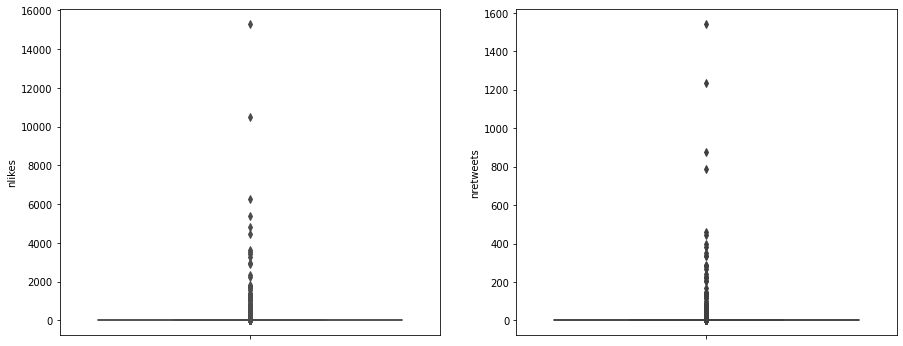

In [ ]:
# Distribution
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df1["nlikes"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df1["nretweets"])
plt.show()

In [ ]:
df1["nlikes"].describe()

count    10012.000000
mean        15.352277
std        240.262249
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      15303.000000
Name: nlikes, dtype: float64

In [ ]:
df1["nretweets"].describe()

count    10012.000000
mean         1.815421
std         26.963515
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1542.000000
Name: nretweets, dtype: float64

In [ ]:
user = df1['username'].value_counts()
user[:6]

detikcom          176
fansharustau      168
detiksport        147
harus_kamutahu    119
Bolanet           114
idntimes           94
Name: username, dtype: int64

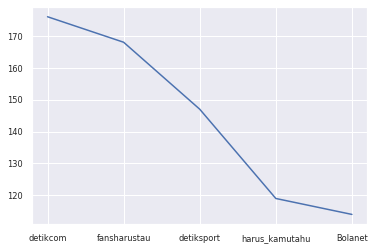

In [ ]:
sns.set(font_scale=0.75)
plt.rcParams.update({'font.size': 10})
plt.plot(user[user>100]) 

plt.show()

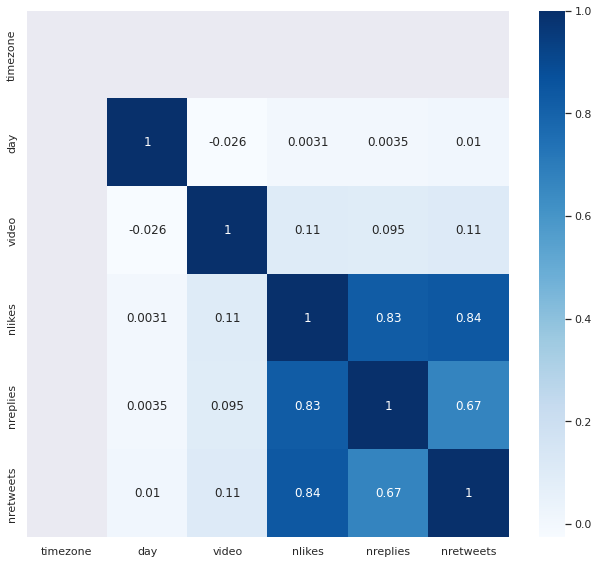

In [ ]:
cor =df1.corr()
sns.set(font_scale=1)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

## **Sentiment Analysis**

In [ ]:
#Mendefinisikan objek sentimen dengan menggunakan TextBlob
sentiment_objects = [TextBlob(tweet) for tweet in tweet_list]

sentiment_objects[0].polarity, sentiment_objects[0]

(0.0,
 TextBlob("coba cek deh twibbonize argentina juara piala dunia 2022 lalu link twbb 55856f bf6109 fabbb3 ac4c04 7d9978 b890a0 b0b870 989098 a8b0c0 703838 a07070 806090 c0c058 788078 a8b078 c8c878 402028 483080 70b078 part"))

In [ ]:
#Membuat sebuah list yang berisi nilai polarity dan tweet text
sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

# Print nilai baris ke-0
sentiment_values[0]

# Print semua nilai sentimen
sentiment_values[0:99]

[[0.0,
  'coba cek deh twibbonize argentina juara piala dunia 2022 lalu link twbb 55856f bf6109 fabbb3 ac4c04 7d9978 b890a0 b0b870 989098 a8b0c0 703838 a07070 806090 c0c058 788078 a8b078 c8c878 402028 483080 70b078 part'],
 [0.0,
  'cnnindonesia makanya suporter spotip jangan turun lapang dukung kalah ngeri gmn piala dunia'],
 [0.4,
  'info bola lionel messi barcelona free agent juli 2023 kembali sang icon capten catalan sportalavista the goat barcelona cinta musim panas 2023 beritaolahraga pialadunia infobola worldcup agenbola'],
 [0.0, 'maskapai baik dunia piala oscar layan'],
 [0.16666666666666666,
  'main turun indonesia van bronchost mnjadi kapten belanda hasil capai babakfinal piala dunia ibu orang saparua'],
 [0.0,
  'juru latih paris saint germain psg christophe galtier percaya relasi kylian mbappe lionel messi baik baik usai piala dunia 2022 kumparanbola'],
 [0.0, 'piala dunia 2022 qatar kesan kekal'],
 [0.0, 'moriyasu tetap latih timnas jepang hingga piala dunia 2026'],
 [0.0

In [ ]:
# Membuat dataframe yang berisi polarity beserta tweetnya masing-masing
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])
sentiment_df

,polarity,tweet
0,0.000000,coba cek deh twibbonize argentina juara piala ...
1,0.000000,cnnindonesia makanya suporter spotip jangan tu...
2,0.400000,info bola lionel messi barcelona free agent ju...
3,0.000000,maskapai baik dunia piala oscar layan
4,0.166667,main turun indonesia van bronchost mnjadi kapt...
...,...,...
10010,0.000000,sukses berapa hoki taruh piala dunia
10011,0.000000,rapper nama drake hilang uang rp15 miliar mesk...
10012,0.000000,rapper nama drake hilang uang rp15 miliar mesk...
10013,0.000000,amierkhan25 bendower67 faktasepakbola portugal...


In [ ]:
#Menyimpan kolom polarity sebagai variabel 'n'
n=sentiment_df["polarity"]

#Mengkonversi 'n' sebagai series 'm' 
m=pd.Series(n)
m

0        0.000000
1        0.000000
2        0.400000
3        0.000000
4        0.166667
           ...   
10010    0.000000
10011    0.000000
10012    0.000000
10013    0.000000
10014    0.000000
Name: polarity, Length: 10015, dtype: float64

In [ ]:
#Definisikan variabel 'pos', 'neg', 'neu'.
pos=0
neg=0
neu=0

#Membuat loop untuk mengklasifikasi tweet sebagai tweet yang positif, negatif, atau netral
for items in m:
    if items>0:
        print("Positif")
        pos=pos+1
    elif items<0:
        print("Negatif")
        neg=neg+1
    else:
        print("Netral")
        neu=neu+1
        
print(pos,neg,neu)

Streaming output truncated to the last 5000 lines.
Positif
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Positif
Positif
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Positif
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Positif
Positif
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Positif
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral
Netral

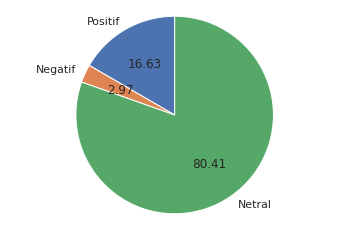

In [ ]:
pieLabels=["Positif","Negatif","Netral"]

populationShare=[pos,neg,neu]

figureObject, axesObject = plt.subplots()

axesObject.pie(populationShare,labels=pieLabels,autopct='%1.2f',startangle=90)

axesObject.axis('equal')

plt.show()

Berdasarkan hasil polarity, secara keseluruhan diperoleh sentimen opini berupa

* 1665 tweets atau 16.63% user merasa positif terhadap Piala Dunia 2022
* 297 tweets atau 2.97% user merasa negatif terhadap Piala Dunia 2022
* 8053 tweets atau 80.41% user merasa netral terhadap Piala Dunia 2022



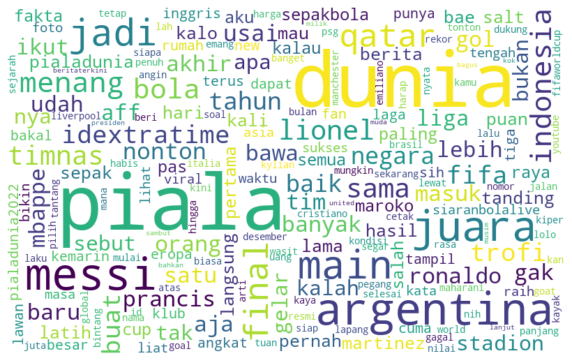

In [ ]:
#Membuat wordcloud dari tweet
all_words = ' '.join([text for text in tweet_list])
wordcloud = WordCloud(collocations = False, background_color='white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Dengan Menggunakan VOYANT didapat visualisasi word cloud sebagai berikut:

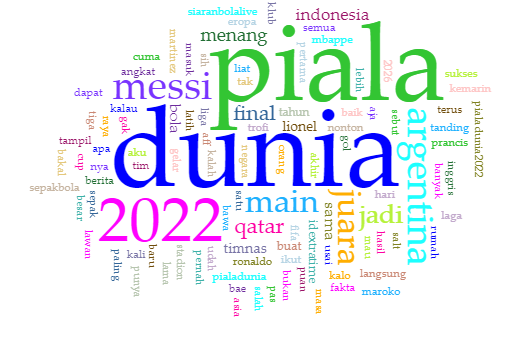

Dari WordCloud menggunakan library atau Voyant menghasilkan hasil yang similar, terlihat bahwa kata-kata yang sering muncul atau disebut adalah piala, dunia, 2022, argentina, messi, juara, dsb.

## **Social Network Analysis**

In [ ]:
pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.5 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=57d353852e0ecd82bfc4e960a199d3aa0a2b1f37d77317f25bdc10f86c8cc605
  Stored in directory: /root/.cache/pip/wheels/ff/62/9e/0ed2d25fd4f5761e2d19568cda0c32716556dfa682e65ecf64
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.8
    Uninstalling networkx-2.8.8:
      Successfully uninstalled networkx-2.8.8


Unique tweets: 9412
All tweets: 10012


Text(0.5, 1.0, 'Mentioned vs. Total in tweets')

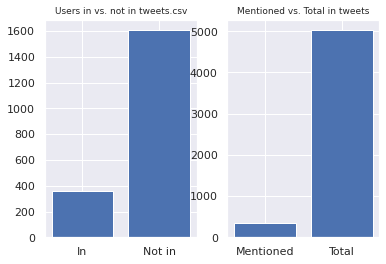

In [ ]:
import networkx as nx

print("Unique tweets: {}".format(len(df1['tweet'].unique())))
print("All tweets: {}".format(len(df1['tweet'])))

retweets = []
actual_tweets = []
for user, tweet in zip(df1['username'], df1['tweet']):
    match = re.search(r'^\bRT\b', tweet)
    if match == None:
        actual_tweets.append([user,tweet])
    else:
        retweets.append([user,tweet])   

actual_tweets = np.array(actual_tweets)
retweets = np.array(retweets)

in_set = []
not_in_set = []
for record in actual_tweets:
    match = re.findall(r'@\w*', record[1])
    if match != []:
        for name in match:
            if (name[1:] in df1['username'].unique()) and (record[0] != name[1:]):
                in_set.append([record[0], name[1:]])
            elif record[0] != name[1:]:
                not_in_set.append([record[0], name[1:]])

in_set = np.array(in_set)
not_in_set = np.array(not_in_set)

fig, ax = plt.subplots(1,2)

ax[0].bar([1,2], [len(np.unique(in_set[:,1])), len(np.unique(not_in_set[:,1]))], align='center')
ax[0].set_xticks([1,2])
ax[0].set_xticklabels(['In', 'Not in'])
ax[0].set_title('Users in vs. not in tweets.csv', fontsize=9)

ax[1].bar([1,2], [len(np.unique(in_set[:,1])), len(df1['username'].unique())], align='center')
ax[1].set_xticks([1,2])
ax[1].set_xticklabels(['Mentioned', 'Total'])
ax[1].set_title('Mentioned vs. Total in tweets', fontsize=9)

Dengan mengulangi setiap tweet dan menghapus nama pengguna/user tersebut (di mana pengguna tidak menyebutkan dirinya sendiri). Nama pengguna ini kemudian ditentukan untuk menjadi pengguna dari dalam dataset atau tidak dalam dataset. 

Dapat terlihat dari grafik pertama bahwa mayoritas pengguna yang disebutkan berada di luar cakupan kumpulan data. Hal ini memberi informasi bahwa untuk menghasilkan grafik sosial di mana grafik dari semua pengguna yang disebutkan dapat dibangun dari yang diketahui (dalam dataset) dan yang tidak diketahui (tidak dalam dataset). Namun kelompok kami akan fokus hanya ada pada data di dataset karena jumlah pengguna yang lebih kecil untuk diolah.

Grafik kedua menunjukkan berapa banyak pengguna di data yang telah disebutkan oleh pengguna lain di dalam dataset. Sehingga dapat diketahui bahwa terdapat total jumlah interaksi yang cukup banyak antara pengguna.

In [ ]:
graph = nx.Graph()

all_users = list(set(in_set[:,0]) | set(in_set[:,1]))
graph.add_nodes_from(all_users, count=10)
node_colours = []

for node in graph.nodes():
    if node in (set(in_set[:,0]) & set(in_set[:,1])):
        node_colours.append('g')
    elif node in np.unique(in_set[:,0]):
        node_colours.append('r')
    elif node in np.unique(in_set[:,1]):
        node_colours.append('b')

In [ ]:
# edges = {}
# occurrence_count = Counter(map(tuple, in_set))
# for (sender, receiver), count in occurrence_count.items():
#     if (receiver, sender) in edges.keys():
#         edges[(receiver, sender)] = edges[(receiver, sender)] + count
#     else:
#         edges[(sender, receiver)] = count
        
# for (sender, receiver), count in edges.items():
#     graph.add_edge(sender, receiver, weight=count)
    
# followers = {}
# tweet_num = {}
# for username in all_users:
#     followers[username] = df_new[df_new['username'] == username]['author_followers'].unique()[-1]
#     tweet_num[username] = df_new[df_new['username'] == username]['tweet'].count()

# sizes = [(followers[n] / tweet_num[n]) * 50 for n in graph.nodes()]

# plt.figure(figsize=(12,12))
# nx.draw(graph, pos=nx.spring_layout(graph),
#         node_color=node_colours, with_labels=True)
# plt.show()

In [ ]:
seed = 0
np.random.seed(seed)

In [ ]:
users = df1.username.to_list()
tweets = df1.tweet.to_list()
print( users[:7] )

['_____r__baraas', 'umbaran14578525', 'sportalavista', 'idntimes', 'fansharustau', 'kumparan', 'DagangNews']


In [ ]:
G = nx.Graph() # Graph Kosong Baru
G.add_nodes_from(users) # Menambahkan node

print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  5024
Banyak Edges =  0


In [ ]:
for usr, t in zip(users, tweets):
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", t)
    for mention in mentionS:
        if "." not in mention: #skipping emails
            G.add_edge(usr, mention)
            
print('Banyak vertex = ', G.number_of_nodes())
print('Banyak Edges = ', G.number_of_edges())

Banyak vertex =  6669
Banyak Edges =  4223


In [ ]:
print("Export ke GexF untuk di import ke Gephi")
nx.write_gexf(G, "pialadunia.gexf")

Export ke GexF untuk di import ke Gephi


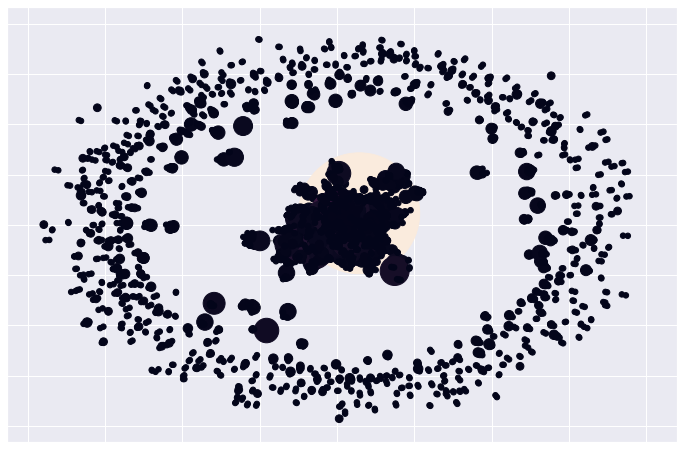

In [ ]:
# Draw the Tweet Graph
plt.subplots(figsize=(12,8))

d = nx.degree(G)
pos = nx.spring_layout(G, seed=seed) # Spring LayOut
D = [d[node]*30 for node in G.nodes()]
nx.draw_networkx_nodes(G, pos, node_size=D, node_color=D) # Gambar Vertex
nx.draw_networkx_edges(G, pos, width=1, alpha=0.5) # Gambar edges
#nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
plt.show() # Show the graph

**Centrality Analysis**

In [ ]:
import operator

def Centrality(G, N=10, method='katz', outliers=False, Label = True, layOut='shells'):
    if method.lower()=='katz':
        phi = 1.618033988749895 # largest eigenvalue of adj matrix
        ranking = nx.katz_centrality_numpy(G,1/phi)
    elif method.lower() == 'degree':
        ranking = nx.degree_centrality(G)
    elif method.lower() == 'eigen':
        ranking = nx.eigenvector_centrality_numpy(G)
    elif method.lower() =='closeness':
        ranking = nx.closeness_centrality(G)
    elif method.lower() =='betweeness':
        ranking = nx.betweenness_centrality(G)
    elif method.lower() =='harmonic':
        ranking = nx.harmonic_centrality(G)
    elif method.lower() =='percolation':
        ranking = nx.percolation_centrality(G)
    else:
        print('Error, Unsupported Method.'); return None

    important_nodes = sorted(ranking.items(), key=operator.itemgetter(1))[::-1]#[0:Nimportant]
    data = np.array([n[1] for n in important_nodes])
    dnodes = [n[0] for n in important_nodes][:N]
    if outliers:
        m = 1 # 1 standard Deviation CI
        data = data[:N]
        out = len(data[abs(data - np.mean(data)) > m * np.std(data)]) # outlier within m stDev interval
        if out<N:
            dnodes = [n for n in dnodes[:out]]

    print('Influencial Users: {0}'.format(str(dnodes)))
    print('Influencial Users Scores: {0}'.format(str(data[:len(dnodes)])))
    Gt = G.subgraph(dnodes)
    return Gt

def drawGraph(G, Label, layOut='spring', graphStyle=False, K = 200):
    if graphStyle:
        ranking = nx.degree_centrality(G)
        warna = list(ranking.values())
        d = nx.degree(G)
        d = [d[node]*K for node in G.nodes()]
        pos = nx.spring_layout(G) # Spring LayOut
        nx.draw_networkx_nodes(G,pos, node_color=warna,node_size=d) # Gambar Vertex
        nx.draw_networkx_edges(G,pos,width=2,alpha=0.1) # Gambar edges
        nx.draw_networkx_labels(G,pos) #Gambar Label Nodes
        plt.show() # Show the graph
    else:
        if layOut.lower()=='spring':
            pos = nx.spring_layout(G)
        elif layOut.lower()=='circular':
            pos=nx.circular_layout(G)
        elif layOut.lower()=='random':
            pos = nx.random_layout(G)
        elif layOut.lower()=='shells':
            shells = [G.core_nodes,sorted(G.major_building_routers, key=lambda n: nx.degree(G.topo, n)) + G.distribution_routers + G.server_nodes,G.hosts + G.minor_building_routers]
            pos = nx.shell_layout(G, shells)
        elif layOut.lower()=='spectral':
            pos=nx.spectral_layout(G)
        else:
            print('Graph Type is not available.')
            return
        nx.draw_networkx_nodes(G,pos, alpha=0.2,node_color='blue',node_size=600)
        if Label:
            nx.draw_networkx_labels(G,pos)
        nx.draw_networkx_edges(G,pos,width=4)
        plt.show()

Dalam teori graf dan network analysis, terdapat empat cara untuk mengukur centrality, yaitu dengan cara menghitung degree centrality, betweeness centrality, closeness centrality dan eigenvector centrality.

Kemudian dapat digambar objek grafik dalam layout yang berbeda seperti bentuk Spring, Circular, Random, Shells, Spectral, dll

In [ ]:
# untuk memeriksa pengguna yang paling "penting" dalam Grafik ini
Gt = Centrality(G, N=10, method='degree', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'SiaranBolaLive', 'GOAL', 'FaktaSepakbola', 'registaco', 'PSSI', 'CNNIndonesia', 'TumbalProyekk', 'jfelixdiaz', 'SerieA']
Influencial Users Scores: [0.07303539 0.02429514 0.01124775 0.01109778 0.00689862 0.00674865
 0.00494901 0.00479904 0.0044991  0.0044991 ]


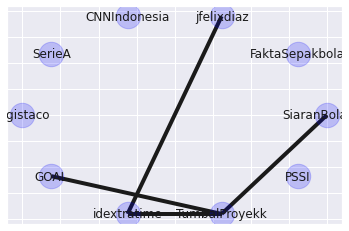

In [ ]:
drawGraph(Gt, True, layOut='circular')

Degree Centrality bertujuan untuk melihat berapa banyak koneksi yang dimiliki node. 

Di atas dapat dilihat bahwa akun Twitter idextratime memiliki nilai degree centrality paling tinggi karena terhubung/memiliki koneksi dengan dua node lain (user SiaranBolaLive dan user TumbalProyekk), dimana node tersebut (user TumbalProyekk) masih bercabang lagi sehingga akun Twitter idextratime mengungguli.

In [ ]:
Gt = Centrality(G, N=10, method='closeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'HideTride', 'TumbalProyekk', 'rezakaisar3', 'RevoNugroho', 'maik23K', 'SepertiSalju', 'uyeeeb_', 'dani_putra', 'fhrizall']
Influencial Users Scores: [0.1187184  0.10119971 0.10105094 0.09869598 0.09835921 0.09800323
 0.09754322 0.09704533 0.09628202 0.09611632]


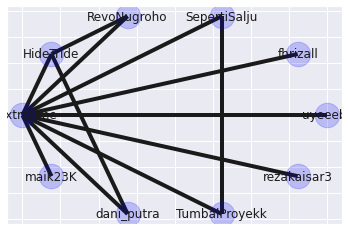

In [ ]:
drawGraph(Gt, True, layOut='circular')

Closeness Centrality bertujuan untuk melihat seberapa dekat node satu dengan node lainnya dapat dihitung dengan invers dari jarak rata-rata dari sebuah node ke semua node lainnya.  Metode ini mampu mengukur seberapa cepat suatu node bisa mengakses node 
lainnya

Akun Twitter idextratime memiliki nilai closeness centrality paling tinggi karena node ini memiliki akses yang cepat ke node lainnya, memiliki rute terpendek untuk mengakses node lainnya.

In [ ]:
Gt = Centrality(G, N=10, method='betweeness', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'SiaranBolaLive', 'murytech', 'PSSI', 'registaco', 'FaktaSepakbola', 'GOAL', 'TumbalProyekk', 'rezakaisar3', 'FIFAWorldCup']
Influencial Users Scores: [0.09565383 0.02543555 0.0179384  0.01480718 0.01320879 0.01155836
 0.00985578 0.00930206 0.00756723 0.00700373]


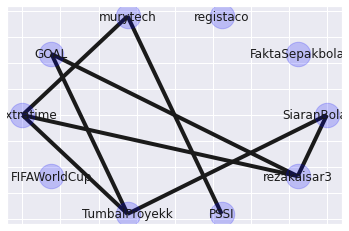

In [ ]:
drawGraph(Gt, True, layOut='circular')

Betweeness Centrality bertujuan untuk melihat berapa banyak jalur terpendek yang melalui node, dapat dihitung dengan mencari probabilitas untuk node menjadi terpendek jalur antara dua node lainnya.

Node yang memiliki nilai Betweeness Centrality paling besar sering digunakan sebagai rujukan dalam memperoleh informasi. Dalam hal ini, akun Twitter idextratime memiliki nilai Betweeness Centrality terbesar karena memiliki jarak yang dekat terhadap node lain.

In [ ]:
Gt = Centrality(G, N=10, method='eigen', outliers=False, Label = True, layOut='spring')

Influencial Users: ['idextratime', 'jfelixdiaz', 'guratanawan', 'ldynfi', 'TumbalProyekk', 'HideTride', 'OnetrickYasuo', 'amazoght', 'SepertiSalju', 'double00_as']
Influencial Users Scores: [0.69830582 0.07599844 0.04133838 0.03997825 0.03961961 0.03943715
 0.03857594 0.03847055 0.03838879 0.03815436]


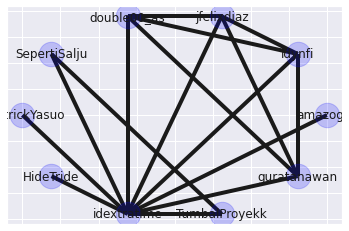

In [ ]:
drawGraph(Gt, True, layOut='circular')

Eigen Centrality merupakan ukuran yang memberikan bobot yang lebih tinggi pada node yang terhubung dengan node, yang juga memiliki keterhubungan tinggi. 

Akun Twitter idextratime memiliki nilai eigen centrality paling besar karena dari Graph dapat terlihat node tersebut memiliki keterhubungan yg tinggi dengan node-node lainnya.

**Community Detection**

visualisasi dengan menggunakan gephi

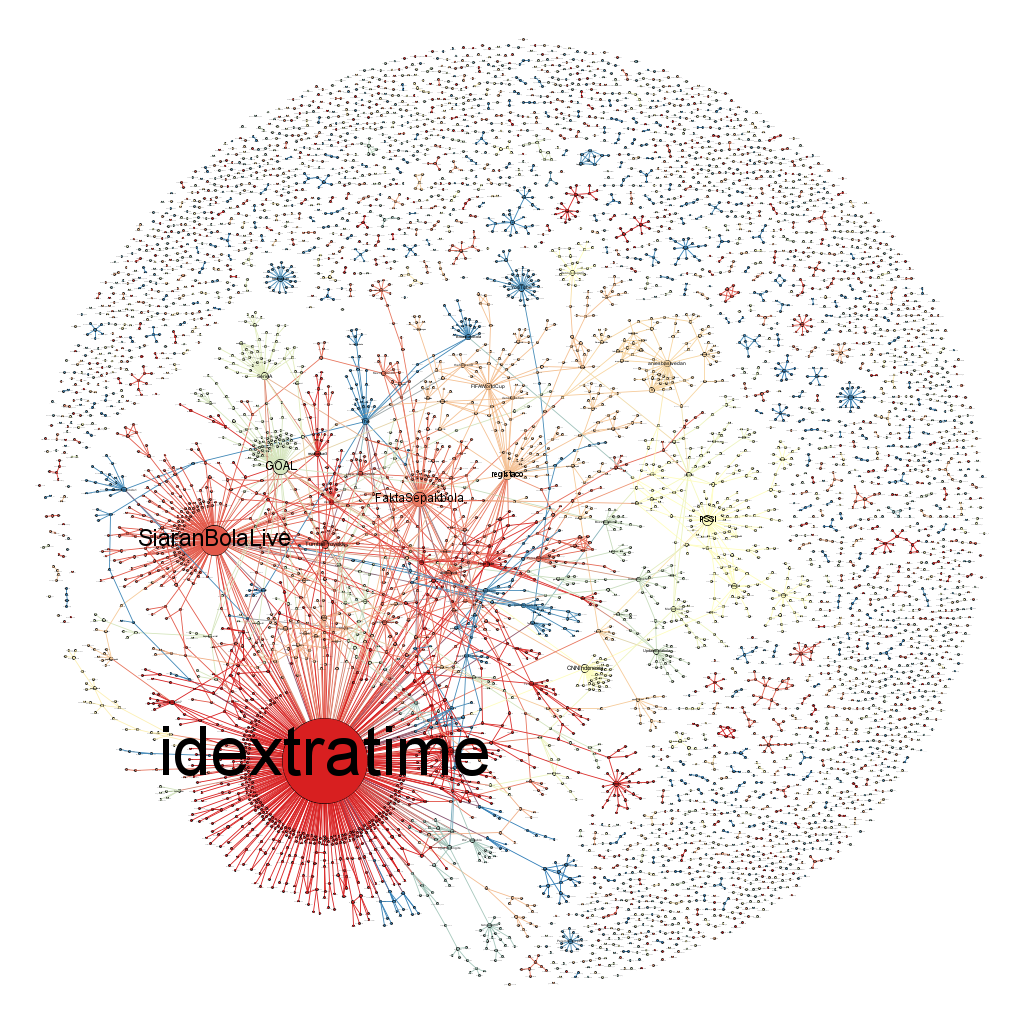

Terlihat bahwa terdapat 1 kluster besar, yang berwarna merah. Jika dilihat dari username-username yang termasuk dalam kluster ini, mereka merupakan akun yang memang berfokus pada sepak bola yang menyebarkan informasi dan mengamati dunia persepakbolaan, untuk cluster lainnya terlihat pada kluster hijau dan kuning dominan oleh akun-akun berita resmi baik dari dunia sepak bola maupun tidak.

Node idextratime memiliki ukuran huruf paling besar yang artinya idwiki mempunyai peran dalam penyebaran 
informasi yang luas.

## **Kesimpulan**

-	Secara garis besar, data yang diperoleh masih terdapat banyak *missing values* sehingga kami melakukan preprocessing untuk menghilangkan kolom dengan *missing values* yang banyak dan menghapus kolom yang tidak digunakan dalam analisis.
-	Setelah dilakukan analisis visualisasi polaritas, didapatkan hasil bahwa opini masyarakat twitter terhadap Piala Dunia 2022 bagus karena reaksi masyarakat twitter sebanyak 80.41% beropini netral. Sedangkan yang beropini negatif bisa terbilang sedikit yaitu sebanyak 2.97%.
-	Akun-akun olahraga yang memiliki *followers* besar di Twitter seperti Idextratime, SiaranBolaLive, FaktaSepakBola, Goal_ID, dan registaco sangat berpengaruh untuk penyebaran berita dalam keberlangsungan Piala Dunia 2022. 
-	*Trending* yang muncul di Twitter yaitu dengan *keyword* “Piala, Dunia, 2022, dsb” dapat membantu pengguna Twitter untuk mengetahui perkembangan informasi mengenai Piala Dunia 2022 dengan cepat ketika mengklik *trending topic* tersebut.
- Akun Twitter Idextratime adalah akun yang dapat dijangkau dengan mudah karena memiliki koneksi dengan akun-akun lain, dapat menjangkau semua orang di Twitter dengan cepat, dan memiliki keterhubungan dengan akun lain yang terhubung dengan baik. Oleh karena itu, akun Idextratime memiliki nilai sentralitas tertinggi. Dengan kata lain, akun Idextratime merupakan akun penting dalam keberlangsungan Piala Dunia 2022.
